In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import jax
#jax.config.update('jax_platform_name', 'cpu')

In [3]:
from entot.data.data import create_gaussians, create_gaussian_split
from entot.plotting.plots import plot_1D
from entot.models.models import NoiseOutsourcingModel, GromovNOM
from entot.models.utils import MixtureNormalSampler
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp

In [4]:
sampler_source = MixtureNormalSampler([[0,0]], 2, 100, 0.5)
sampler_target = MixtureNormalSampler([-1.0,1.0], 1, 100, 0.1)

In [5]:
source = sampler_source(jax.random.PRNGKey(0))
target = sampler_target(jax.random.PRNGKey(0))

In [6]:
source.shape, target.shape

((100, 2), (100, 1))

<Axes: xlabel='1', ylabel='2'>

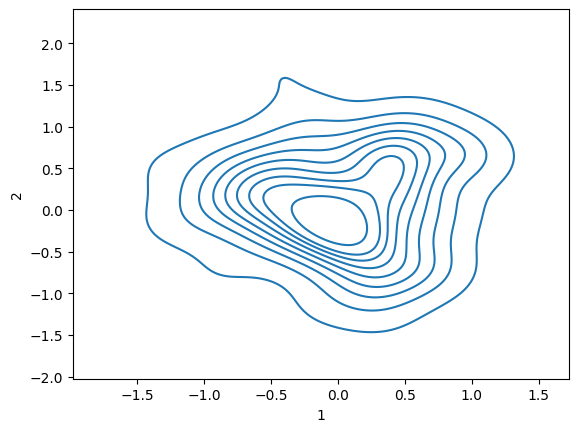

In [7]:
import seaborn as sns
import pandas as pd
sns.kdeplot(pd.DataFrame(source, columns=["1", "2"]), x="1", y="2")


<Axes: ylabel='Density'>

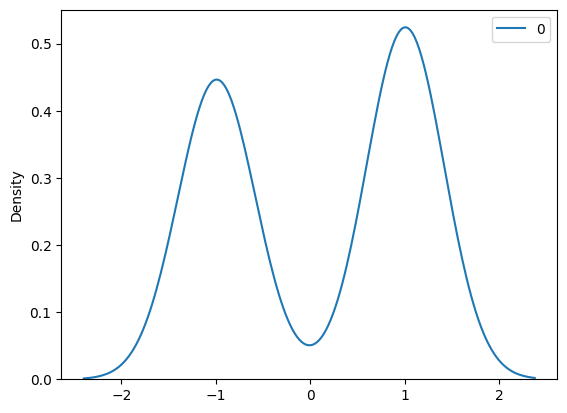

In [8]:
sns.kdeplot(pd.DataFrame(target))

In [9]:
sm = GromovNOM(0.1, 512, 512, iterations=1000, inner_iterations=20, input_dim=2, output_dim=1, noise_dim=4, std=0.1)

In [10]:
sm(sampler_source, sampler_target)

100%|██████████| 1000/1000 [58:57<00:00,  3.54s/it]


[autoreload of entot.models.models failed: Traceback (most recent call last):
  File "/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/home/dominikk/mambaforge/envs/ott/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/dominikk/git_repos/entot/entot/models/models.py", line 534, in <module>
    class KantorovichGap():
  File "/home/dominikk/git_repos/entot/entot/models/models.py", line 535, in KantorovichGap
    def __init__(self, epsilon: floa

<Axes: ylabel='Density'>

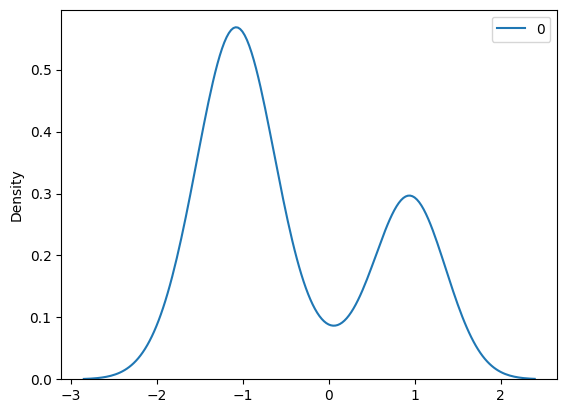

In [11]:
transported = sm.transport(source)
sns.kdeplot(transported)

<Axes: ylabel='Density'>

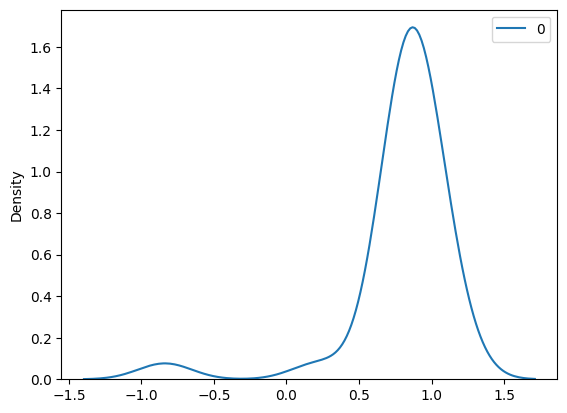

In [12]:
source_top_left = source[(source[:,0]<0.0) & (source[:,1]>0.0)]
top_left_transported = sm.transport(source_top_left)
sns.kdeplot(top_left_transported)

<Axes: ylabel='Density'>

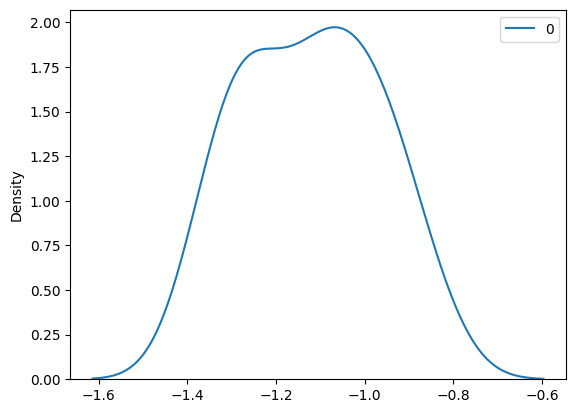

In [13]:
source_bottom_right = source[(source[:,0]>0.0) & (source[:,1]<0.0)]
bottom_right_transported = sm.transport(source_bottom_right)
sns.kdeplot(bottom_right_transported)

In [15]:
sm.metrics.keys()



dict_keys(['t_obj', 'phi_obj'])

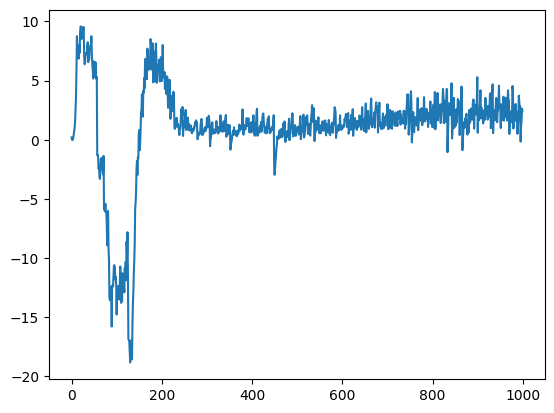

In [17]:
plt.plot(np.arange(len(sm.metrics["t_obj"])), sm.metrics["t_obj"])

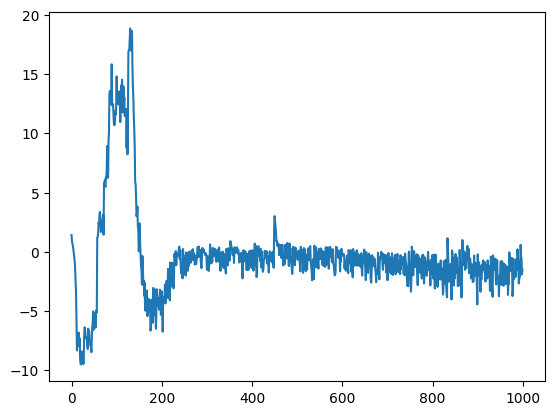

In [18]:
plt.plot(np.arange(len(sm.metrics["phi_obj"])), sm.metrics["phi_obj"])